In [14]:
import pandas as pd
import numpy as np
import os


import sys
sys.path.append('../src')
from preprocess import get_train_test

DATA_PATH = '../input/'


In [27]:
data = get_train_test(0)
data.head()

/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3347: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
../src/preprocess.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  before_180_cart_log = before_180_cart_log[idx_not_target]


,session_id,registor_number,user_id,sex,age,distance_to_the_store,start_at__date,start_at__hour,test,target,...,cart_JAN_nunique,user_n_items_sum,user_coupon_is_activated_sum,user_duration_min,user_duration_max,user_JAN_nunique,user_created_at__hour_min,user_created_at__hour_max,user_created_at__hour_median,user_created_at__date_nunique
0,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,0,0,0,62.0,2.0,2021-12-04,11,False,0,...,0.0,111.0,0.0,7.0,1744.0,77.0,10.0,16.0,13.0,11.0
1,00011e97d485ffb7f78662972da6032d4103b1628d541f...,1,1,0,57.0,4.0,2021-11-18,19,False,0,...,4.0,192.0,2.0,6.0,1960.0,105.0,13.0,20.0,17.0,23.0
2,000280d2156d179a597167b269a69e5af556725eeaabae...,2,2,0,37.0,17.0,2022-01-25,13,True,255,...,3.0,107.0,4.0,10.0,2043.0,87.0,10.0,14.0,12.0,5.0
3,0002a4a49d2230456ce57f9709b7c97e1ee324906f4ed8...,3,3,0,32.0,18.0,2021-12-20,17,False,0,...,0.0,65.0,1.0,9.0,4161.0,53.0,17.0,18.0,17.0,2.0
4,000383cb2018d041d4976a0e26d2dc0b73918abd5a30c9...,4,4,0,27.0,2.0,2021-11-11,8,False,0,...,2.0,264.0,0.0,4.0,2300.0,192.0,7.0,22.0,14.0,17.0


In [3]:
data.isnull().sum()

session_id                          0
registor_number                     0
user_id                             0
sex                                 0
age                                 0
distance_to_the_store               0
start_at__date                      0
start_at__hour                      0
test                                0
target                              0
day                                 0
week                                0
buy_cheese_already                  0
buy_dairy_products                 31
cart_n_items_sum                   31
cart_coupon_is_activated_sum       31
cart_duration_min                  31
cart_duration_max                  31
cart_JAN_nunique                   31
user_n_items_sum                 1610
user_coupon_is_activated_sum     1610
user_duration_min                1610
user_duration_max                1610
user_JAN_nunique                 1610
user_created_at__hour_min        1610
user_created_at__hour_max        1610
user_created

In [4]:
data.describe()

,age,distance_to_the_store,start_at__hour,target,day,buy_cheese_already,buy_dairy_products,cart_n_items_sum,cart_coupon_is_activated_sum,cart_duration_min,...,cart_JAN_nunique,user_n_items_sum,user_coupon_is_activated_sum,user_duration_min,user_duration_max,user_JAN_nunique,user_created_at__hour_min,user_created_at__hour_max,user_created_at__hour_median,user_created_at__date_nunique
count,109161.0,109161.0,109161.000000,109161.000000,109161.000000,109161.000000,109130.000000,109130.000000,109130.000000,109130.000000,...,109130.000000,107551.000000,107551.00000,107551.000000,107551.000000,107551.00000,107551.000000,107551.000000,107551.000000,107551.000000
mean,NaN,NaN,14.360431,60.383012,15.727952,0.002776,0.002034,2.364529,0.034528,11.692651,...,1.991176,253.239338,2.76414,6.087875,2349.784976,149.51119,9.566178,18.618321,14.625643,16.170115
std,0.0,0.0,3.997977,108.334199,8.981708,0.052612,0.074245,2.364226,0.205753,11.913228,...,1.684338,227.378977,3.60181,5.135710,894.610323,106.16147,3.894557,3.092779,3.280513,12.514157
min,-1.0,-1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.00000,0.000000,29.000000,2.00000,0.000000,0.000000,0.000000,1.000000
25%,37.0,2.0,11.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,6.000000,...,1.000000,95.000000,0.00000,4.000000,1724.000000,69.00000,8.000000,17.000000,12.000000,7.000000
50%,52.0,3.0,15.000000,0.000000,16.000000,0.000000,0.000000,2.000000,0.000000,9.000000,...,2.000000,196.000000,2.00000,5.000000,2224.000000,128.00000,10.000000,19.000000,15.000000,13.000000
75%,62.0,7.0,17.000000,1.000000,24.000000,0.000000,0.000000,3.000000,0.000000,13.000000,...,3.000000,347.000000,4.00000,7.000000,2871.000000,208.00000,11.000000,21.000000,17.000000,23.000000
max,100.0,100.0,23.000000,255.000000,31.000000,1.000000,15.000000,99.000000,14.000000,179.000000,...,41.000000,1825.000000,31.00000,219.000000,5395.000000,658.00000,23.000000,23.000000,23.000000,61.000000


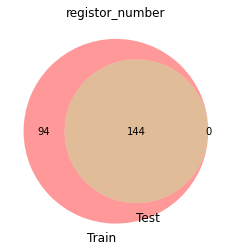

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from typing import List

def get_uniques(input_df: pd.DataFrame, column):
    s = input_df[column]
    return set(s.dropna().unique())


def plot_intersection(
    left: pd.DataFrame, 
    right: pd.DataFrame, 
    target_column: str, 
    ax: plt.Axes = None, 
    set_labels: List[str]=None
):
    venn2(
        subsets=(get_uniques(left, target_column), get_uniques(right, target_column)),
        set_labels=set_labels or ("Train", "Test"),
        ax=ax
    )
    ax.set_title(target_column)

train = data[data['test']==False]
test = data[data['test']==True]
fig, ax = plt.subplots()
plot_intersection(train, test, target_column='registor_number', ax=ax)


In [5]:
test = pd.read_csv('/home/yoshikawa/work/atmaCup/atmaCup13/save/delete_user_id_register_id/submit.csv')
test.head()

,target
0,0.168435
1,0.037609
2,0.082591
3,0.045168
4,0.047731


/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


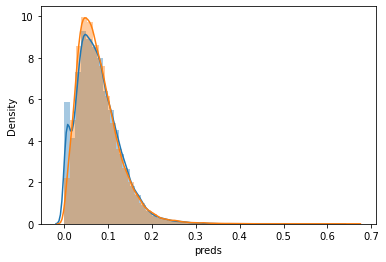

In [8]:

train = pd.read_csv('/home/yoshikawa/work/atmaCup/atmaCup13/save/delete_user_id_register_id/preds.csv')
fig, ax = plt.subplots()
sns.distplot(test['target'], ax=ax, label='Test')
sns.distplot(train['preds'], ax=ax, label='oof')
plt.savefig('oof_test_distplot.png')


In [53]:
data = pd.read_csv(os.path.join(DATA_PATH, "session.csv"))
test_session = pd.read_csv(os.path.join(DATA_PATH, "test_session.csv"))
cart_log = pd.read_csv(os.path.join(DATA_PATH, "cart_log.csv"))
master = pd.read_csv(os.path.join(DATA_PATH, "product_master.csv"))
master_cheese = master[master['category']=='チーズ']


/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [63]:
jan2department = dict(zip(master['JAN'], master['department']))
cart_log = cart_log[~cart_log['JAN'].isin(master_cheese['JAN'].unique())]
log_category = cart_log['JAN'].map(jan2department)
log_category.value_counts().sort_values(ascending=True).head(20)

サービス           1
レディースシューズ      5
ピザ             5
未登録等           8
ワークシューズ        9
スポーツ          17
キッズアウター       30
AV家電          34
ゴルフ           55
調理家電          68
メンズシューズ       80
サンダル          83
園芸用品         103
軽家具・収納       112
カスタマー        114
メンズアクセサリー    126
生活家電         130
レディースアウター    153
パジャマ         161
健康・理美容家電     166
Name: JAN, dtype: int64

In [61]:
log_category.head()

0    NaN
1     果物
2     果物
3    和日配
4    和日配
Name: JAN, dtype: object

In [62]:
cart_log.head()

,session_id,duration,action_name,action_detail,item_name,item_detail,item_detail_add_1,item_detail_add_2,coupon_is_activated,JAN,n_items,created_at__date,created_at__hour
0,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,26,PIN入力,PIN入力,キー,****,NaN,NaN,0,NaN,0,2021-12-04,11
1,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,550,買物,商品追加,商品,2533871000000,みかんM 大箱,1.0,0,2.533871e+12,1,2021-12-04,11
2,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,622,買物,商品追加,商品,2533871000000,みかんM 大箱,1.0,0,2.533871e+12,1,2021-12-04,11
3,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,698,買物,商品追加,商品,4972807218857,大盛__白糸こんにゃく５０,1.0,0,4.972807e+12,1,2021-12-04,11
4,00003ee1b7f34620ae81dba533c6d5a544513004fe5688...,701,買物,商品追加,商品,4972807218857,大盛__白糸こんにゃく５０,1.0,0,4.972807e+12,1,2021-12-04,11


In [64]:
use_department = log_category.value_counts()
idx = log_category.isin(use_department.index)
_piv = pd.pivot_table(data=cart_log[idx],
                      index="session_id",
                      columns=log_category[idx], 
                      aggfunc="sum",
                      values="n_items")
_piv = _piv.fillna(0).astype(int)
target_columns = _piv.columns.tolist()
_piv.head()

JAN,100円均一,AV家電,おもちゃ,たばこ,アイスクリーム,インテリア,オーラルケア,カスタマー,カー用品,キッズアウター,...,衛生,調理品,調理家電,調理素材,豚肉,軽家具・収納,農産加工,野菜,鶏肉,麺類
session_id,,,,,,,,,,,,,,,,,,,,,
00003ee1b7f34620ae81dba533c6d5a544513004fe5688b2a88560e071799c0e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00011e97d485ffb7f78662972da6032d4103b1628d541f8f0b916fc011a592e6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
000280d2156d179a597167b269a69e5af556725eeaabae21226d755f73bf0bd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
0002a4a49d2230456ce57f9709b7c97e1ee324906f4ed8993b579d0ef0ed6135,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,1
000383cb2018d041d4976a0e26d2dc0b73918abd5a30c94179441f321aa598c0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,2,1,5


/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12450 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yoshikawa/.pyenv/versions/3.8.5/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/yosh

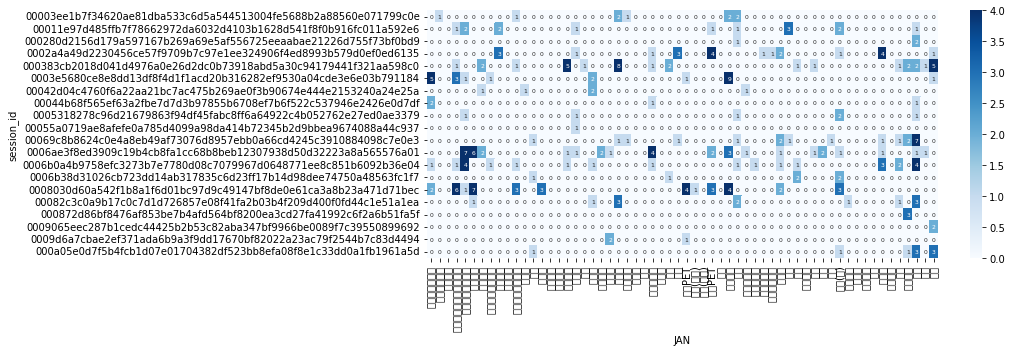

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(_piv.head(20), cmap="Blues", vmin=0, vmax=4, ax=ax, fmt="0d", annot=True, annot_kws={"fontsize": 6})

fig.tight_layout()

In [66]:
same_session_department_df = pd.merge(
        train, 
        _piv, on='session_id', 
        how="left"
    ).groupby("target")[target_columns]\
    .mean()\
    .T


In [67]:
same_session_department_df["difference"] = same_session_department_df[1] - same_session_department_df[0]
same_session_department_df["difference_ratio"] = same_session_department_df["difference"] / same_session_department_df[0]
same_session_department_df = same_session_department_df.sort_values(1, ascending=False)

In [72]:
same_session_department_df.sort_values("difference").head(30)


target,0,1,difference,difference_ratio
米飯(麺),0.373672,0.359425,-0.014248,-0.038129
猫フード,0.108897,0.099773,-0.009124,-0.083787
寿司(鮮魚),0.098680,0.093565,-0.005114,-0.051828
和酒,0.071299,0.067676,-0.003623,-0.050817
たばこ,0.013280,0.009992,-0.003287,-0.247547
冷惣菜,0.099957,0.097048,-0.002909,-0.029106
寿司(惣菜),0.059401,0.057381,-0.002020,-0.034006
ワークグッズ,0.004848,0.003179,-0.001669,-0.344178
季節家電,0.002932,0.002271,-0.000661,-0.225506
メンズアウター,0.002150,0.001514,-0.000636,-0.295914
